Road Safety Data

In this notebook, we will explore the Road Safety Data (https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) where detailed road safety is reported and recorded in this dataset for year 2021, using the STATS19 accident reporting form. Given that the Department for Transport has only made datasets available to the public, stakeholders and researchers for the first time since 2018, it shows that research on road safety is lacking. Therefore the aim of this analysis is to provide further insights to the study.

### Data Preparation
<a id='1. Data Prepartion'></a>

In [91]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Accidents Data**

In [3]:
accidents = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 42358 
Columns: 37


,status,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2021010287148,2021,010287148,521508.0,193079.0,NaN,NaN,1,3,...,0,4,7,4,1,0,-1,1,-1,-1
1,Unvalidated,2021010287149,2021,010287149,535379.0,180783.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
2,Unvalidated,2021010287151,2021,010287151,529701.0,170398.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
3,Unvalidated,2021010287155,2021,010287155,525312.0,178385.0,NaN,NaN,1,1,...,4,4,1,1,0,0,-1,1,-1,-1
4,Unvalidated,2021010287157,2021,010287157,512144.0,171526.0,NaN,NaN,1,3,...,0,4,1,1,0,0,-1,1,-1,-1


In [12]:
#accidents.info()

#### Converting Datetime Column
<a id='Converting Datetime Column'></a>

In [16]:
import datetime as dt
str = '01,01,2021'
datetime_value = dt.datetime.strptime(str,'%d,%m,%Y')
print(datetime_value) # prints: 2017-01-01 00:00:00

2021-01-01 00:00:00


In [46]:
accidents['date']= pd.to_datetime(accidents['date'], format="%d/%m/%Y")

In [39]:
# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42358 entries, 0 to 42357
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_northing_osgr  41789 non-null  float64
 1   longitude               0 non-null      float64
 2   latitude                0 non-null      float64
 3   police_force            42358 non-null  int64  
 4   accident_severity       42358 non-null  int64  
 5   number_of_vehicles      42358 non-null  int64  
 6   number_of_casualties    42358 non-null  int64  
 7   date                    42358 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.7+ MB


In [23]:
# slice first and second string from time column
accidents['Hour'] = accidents['time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

- Morning Rush from 5am to 10am
- Office Hours from 10am to 3pm (or: 10:00 - 15:00)
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00)
- Evening from 7pm to 11pm (or: 19:00 - 23:00)
- Night from 11pm to 5am (or: 23:00 - 05:00)

In [21]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [24]:
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['time', 'Hour', 'Daytime']].head(8)

,time,Hour,Daytime
0,02:05,2,night (23-5)
1,03:30,3,night (23-5)
2,04:07,4,night (23-5)
3,04:26,4,night (23-5)
4,03:10,3,night (23-5)
5,04:10,4,night (23-5)
6,09:33,9,morning rush (5-10)
7,09:30,9,morning rush (5-10)


In [25]:
# drop old time column and temporary hour column
#accidents = accidents.drop(columns=['Time', 'Hour'])

#### Handling Missing Values
<a id=' Handling Missing Values'></a>

In [26]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 2.027 %


In [27]:
#accidents.isna().sum()


###  Exploratory Data Analysis (EDA)
<a id='Exploratory Data Analysis (EDA)'></a>

***Overall view of car accidents in year 2021***

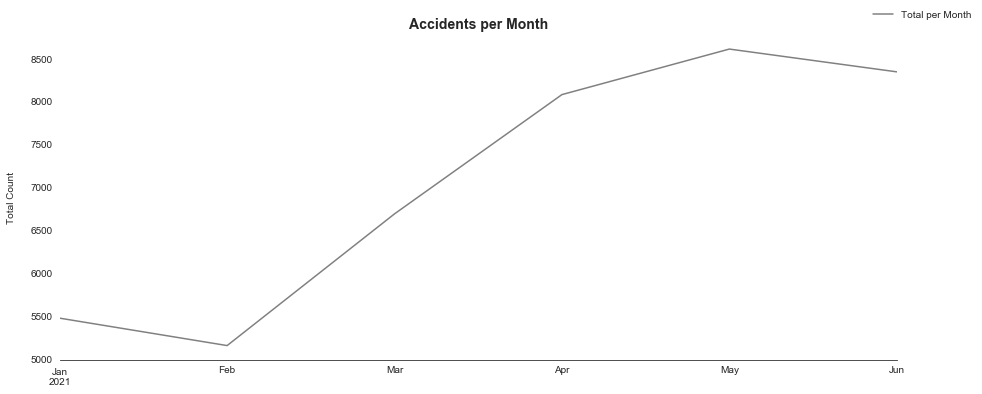

In [92]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)


ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

***How many accidents occur everyday?***

In [93]:
weekday_counts = pd.DataFrame(accidents.set_index('date').resample('1d')['accident_index'].size().reset_index())
weekday_counts.columns = ['date', 'Count']
#weekday_counts

weekday = weekday_counts['date'].dt.strftime("%A")
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,273.730769
Monday,226.500000
Saturday,229.423077
Sunday,183.846154
Thursday,247.360000
Tuesday,237.923077
Wednesday,239.884615


- Plotting this dataframe:

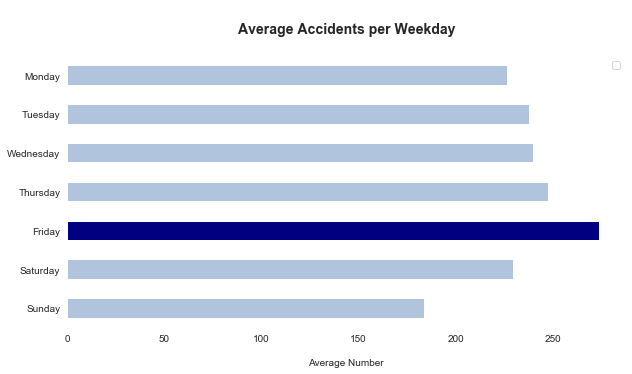

In [65]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

- Preparing another dataframe by weekday and year:

In [68]:
weekday = accidents['date'].dt.strftime("%A")
year    = accidents['date'].dt.year

accident_table = accidents.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2021,4780,5965,7117,6184,6237,6186,5889


- Plotting this second dataframe:

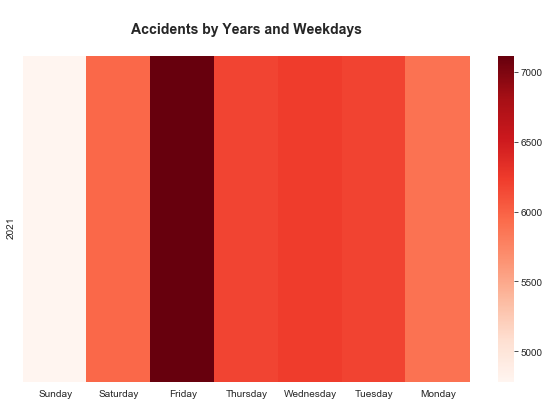

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

***How are accidents related to weather conditions?***

In [72]:
accidents.weather_conditions.value_counts(normalize=True)

1    0.807451
2    0.097951
8    0.033052
9    0.023962
3    0.011757
4    0.010458
5    0.010411
7    0.003612
6    0.001346
Name: weather_conditions, dtype: float64

*If  `Weather_Condition` is "fine" (=1),  accidents are likely to occur*

***How are accidents distributed throughout the day?***

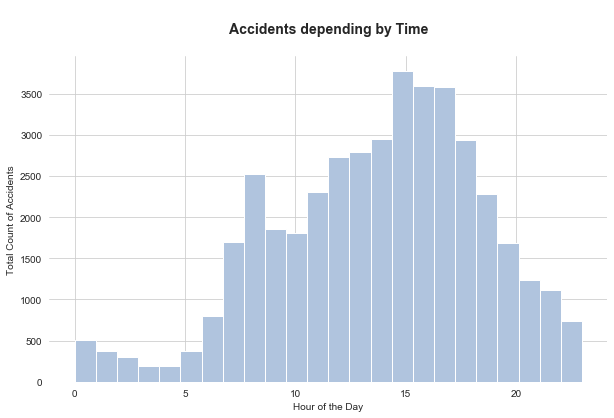

In [84]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

***How are accidents distributed throughout the daytime?***

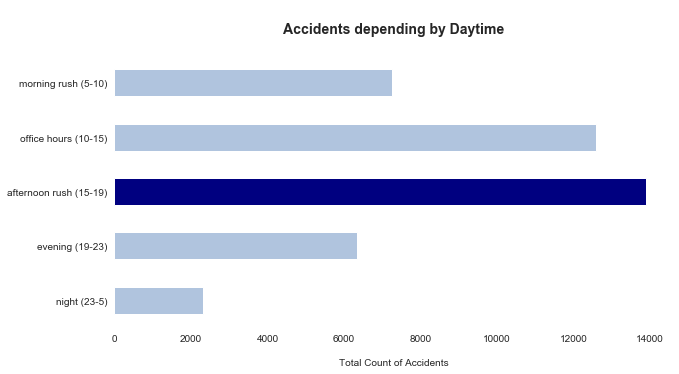

In [85]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = accidents.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);